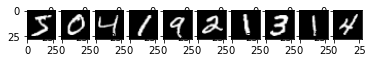

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[7 2 1 0 4 1 4 9 5 9]


In [6]:

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()
print(train_labels[:10])

train_data = train_images.reshape(len(train_images), 28, 28, 1)
test_data = test_images.reshape(len(test_images), 28, 28, 1)
# normalize to 0~1, for convolution computation
train_data = train_data.astype('float32')/255.0
test_data = test_data.astype('float32')/255.0

train_labels2 = to_categorical(train_labels)
test_labels2 = to_categorical(test_labels)
print(test_labels2[:10])
print(test_labels[:10])


In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation=('relu')))
model.add(Dropout(0.5))
model.add(Dense(10, activation=('softmax')))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['acc'])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

Epoch 1/50
96/96 [==============================] - 109s 1s/step - loss: 2.2909 - acc: 0.1526 - val_loss: 2.2695 - val_acc: 0.4288
Epoch 2/50
96/96 [==============================] - 137s 1s/step - loss: 2.2268 - acc: 0.2625 - val_loss: 2.0861 - val_acc: 0.6505
Epoch 3/50
96/96 [==============================] - 141s 1s/step - loss: 1.6167 - acc: 0.4847 - val_loss: 0.7372 - val_acc: 0.8047
Epoch 4/50
96/96 [==============================] - 136s 1s/step - loss: 0.8964 - acc: 0.7015 - val_loss: 0.4322 - val_acc: 0.8851
Epoch 5/50
96/96 [==============================] - 140s 1s/step - loss: 0.6515 - acc: 0.7898 - val_loss: 0.3229 - val_acc: 0.9153
Epoch 6/50
96/96 [==============================] - 140s 1s/step - loss: 0.5220 - acc: 0.8335 - val_loss: 0.2613 - val_acc: 0.9290
Epoch 7/50
96/96 [==============================] - 133s 1s/step - loss: 0.4452 - acc: 0.8599 - val_loss: 0.2255 - val_acc: 0.9372
Epoch 8/50
96/96 [==============================] - 132s 1s/step - loss: 0.3878 - a

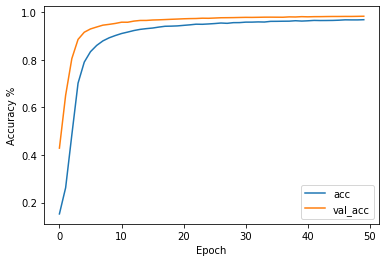

In [8]:

import matplotlib.pyplot as plt

train_history = model.fit(train_data, train_labels2, validation_split=0.2, epochs=50, batch_size=500)

plt.plot(train_history.history['acc'], label='acc')
plt.plot(train_history.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend(loc='best')

plt.show()


In [ ]:

test_loss, test_acc = model.evaluate(test_data, test_labels2)
print(test_acc)

